In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from scipy import stats
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
import function as fc

In [2]:
df_exam_score = pd.read_csv("exam_score_dataset.csv")

In [3]:
# better visualization of numbers
pd.options.display.float_format = '{:,.2f}'.format 

# DATA EXPLORATION AND DATA WRANGLING

##  Dataset exploration

In [4]:
df_exam_score.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.00,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.00,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.00,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.00,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.00,school_bus,5 - 10,76,78,75


In [5]:
# Deleted the first column because it was used  as index but we don't needed as we use pandas dataframe 
df_exam_score.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
df_exam_score.T

,0,1,2,3,4,5,6,7,8,9,...,30631,30632,30633,30634,30635,30636,30637,30638,30639,30640
Gender,female,female,female,male,male,female,female,male,male,female,...,male,female,female,male,male,female,male,female,female,male
EthnicGroup,NaN,group C,group B,group A,group C,group B,group B,group B,group D,group B,...,group E,group D,group C,group A,group C,group D,group E,NaN,group D,group B
ParentEduc,bachelor's degree,some college,master's degree,associate's degree,some college,associate's degree,some college,some college,high school,high school,...,some high school,some college,master's degree,associate's degree,some college,high school,high school,high school,associate's degree,some college
LunchType,standard,standard,standard,free/reduced,standard,standard,standard,free/reduced,free/reduced,free/reduced,...,standard,standard,standard,free/reduced,standard,standard,standard,free/reduced,standard,standard
TestPrep,none,NaN,none,none,none,none,completed,none,completed,none,...,none,none,completed,completed,none,none,none,completed,completed,none
ParentMaritalStatus,married,married,single,married,married,married,widowed,married,single,married,...,married,married,married,NaN,married,single,single,married,married,married
PracticeSport,regularly,sometimes,sometimes,never,sometimes,regularly,never,sometimes,sometimes,regularly,...,sometimes,regularly,never,sometimes,regularly,sometimes,regularly,sometimes,regularly,never
IsFirstChild,yes,yes,yes,no,yes,yes,no,yes,no,yes,...,no,no,no,no,no,no,no,no,no,no
NrSiblings,3.00,0.00,4.00,1.00,0.00,1.00,1.00,1.00,3.00,NaN,...,3.00,3.00,2.00,2.00,2.00,2.00,1.00,1.00,3.00,1.00
TransportMeans,school_bus,NaN,school_bus,NaN,school_bus,school_bus,private,private,private,private,...,school_bus,private,school_bus,school_bus,school_bus,school_bus,private,private,school_bus,school_bus


In [7]:
df_exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [8]:
df_exam_score.describe().T

,count,mean,std,min,25%,50%,75%,max
NrSiblings,"29,069.00",2.15,1.46,0.00,1.00,2.00,3.00,7.00
MathScore,"30,641.00",66.56,15.36,0.00,56.00,67.00,78.00,100.00
ReadingScore,"30,641.00",69.38,14.76,10.00,59.00,70.00,80.00,100.00
WritingScore,"30,641.00",68.42,15.44,4.00,58.00,69.00,79.00,100.00


In [9]:
df_exam_score_copy = df_exam_score.copy()

In [10]:
# print out the unique values for each of columns
fc.print_unique_values(df_exam_score[['EthnicGroup','ParentEduc','Gender','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours']])

Unique values in column 'EthnicGroup': [nan 'group C' 'group B' 'group A' 'group D' 'group E']
Unique values in column 'ParentEduc': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
Unique values in column 'Gender': ['female' 'male']
Unique values in column 'LunchType': ['standard' 'free/reduced']
Unique values in column 'TestPrep': ['none' nan 'completed']
Unique values in column 'ParentMaritalStatus': ['married' 'single' 'widowed' nan 'divorced']
Unique values in column 'PracticeSport': ['regularly' 'sometimes' 'never' nan]
Unique values in column 'IsFirstChild': ['yes' 'no' nan]
Unique values in column 'NrSiblings': [ 3.  0.  4.  1. nan  2.  5.  7.  6.]
Unique values in column 'TransportMeans': ['school_bus' nan 'private']
Unique values in column 'WklyStudyHours': ['< 5' '5 - 10' '> 10' nan]


In [11]:
# Cleaning parent education by replacing specific values with a more general value. 
df_exam_score.loc[df_exam_score['ParentEduc'] == 'some high school', 'ParentEduc'] = 'high school'
df_exam_score.loc[df_exam_score['ParentEduc'] == 'some college', 'ParentEduc'] = "bachelor's degree"

In [12]:
df_exam_score['ParentEduc'].unique()

array(["bachelor's degree", "master's degree", "associate's degree",
       'high school', nan], dtype=object)

array([[<AxesSubplot:title={'center':'NrSiblings'}>,
        <AxesSubplot:title={'center':'MathScore'}>],
       [<AxesSubplot:title={'center':'ReadingScore'}>,
        <AxesSubplot:title={'center':'WritingScore'}>]], dtype=object)

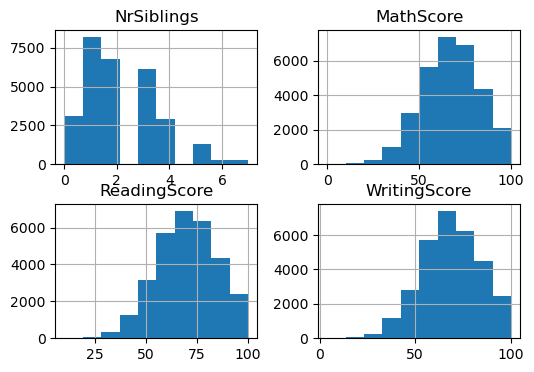

In [13]:
# when I try to plot raw data I get graph of only numerical features. So I decide to clean dataset:
# encoding numerically string values
# then I will handle missing values
df_exam_score.hist(figsize=(6,4))

## DATA CLEANING 

**Numerical encoding for each variable**
- EthnicGroup: One-hot encoding: Each ethnic group has a different binary variable.
- ParentEduc: Numerical encoding from 0 to 3 for different education levels (0 is lower and 3 is higher).
- Gender: Binary encoding: 1 for female, 0 for male.
- LunchType: Binary encoding: 0 for standard, 1 for free/reduced.
- TestPrep: Binary encoding: 1 for completed course, 0 for none.
- PracticeSport: Numerical encoding: 0 for never, 1 for sometimes, 2 for regularly.
- IsFirstChild: Binary encoding: 1 for yes, 0 for no.
- TransportMeans: Binary encoding: 0 for schoolbus, 1 for private transport.
- WklyStudyHours: Numerical encoding: 0 for <5 hours, 1 for 5-10 hours, 2 for >10 hours.


In [14]:
replace_parentEduc={
    'high school':0,
    "bachelor's degree":1,
    "master's degree":2,
    "associate's degree":3
}

df_exam_score['ParentEduc'].replace(replace_parentEduc,inplace=True)

In [15]:
replace_gender={
    'male':0,
    "female":1
}

df_exam_score['Gender'].replace(replace_gender,inplace=True)

In [16]:
replace_LunchType={
    'standard':0,
    "free/reduced":1
}

df_exam_score['LunchType'].replace(replace_LunchType,inplace=True)

In [17]:
replace_TestPrep={
    'none':0,
    "completed":1
}

df_exam_score['TestPrep'].replace(replace_TestPrep,inplace=True)

In [18]:
replace_PracticeSport={
    'never':0,
    "sometimes":1,
    "regularly":2
}

df_exam_score['PracticeSport'].replace(replace_PracticeSport,inplace=True)

In [19]:
replace_IsFirstChild={
    'no':0,
    "yes":1
}

df_exam_score['IsFirstChild'].replace(replace_IsFirstChild,inplace=True)

In [20]:
replace_TransportMeans={
    'school_bus':0,
    "private":1
}

df_exam_score['TransportMeans'].replace(replace_TransportMeans,inplace=True)

In [21]:
replace_WklyStudyHours={
    '< 5' :0,
    '5 - 10':1,
    '> 10':2
}

df_exam_score['WklyStudyHours'].replace(replace_WklyStudyHours,inplace=True)

In [22]:
fc.print_unique_values(df_exam_score[['EthnicGroup','ParentEduc','Gender','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','NrSiblings','TransportMeans','WklyStudyHours']])

Unique values in column 'EthnicGroup': [nan 'group C' 'group B' 'group A' 'group D' 'group E']
Unique values in column 'ParentEduc': [ 1.  2.  3.  0. nan]
Unique values in column 'Gender': [1 0]
Unique values in column 'LunchType': [0 1]
Unique values in column 'TestPrep': [ 0. nan  1.]
Unique values in column 'ParentMaritalStatus': ['married' 'single' 'widowed' nan 'divorced']
Unique values in column 'PracticeSport': [ 2.  1.  0. nan]
Unique values in column 'IsFirstChild': [ 1.  0. nan]
Unique values in column 'NrSiblings': [ 3.  0.  4.  1. nan  2.  5.  7.  6.]
Unique values in column 'TransportMeans': [ 0. nan  1.]
Unique values in column 'WklyStudyHours': [ 0.  1.  2. nan]


In [23]:
df_exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  int64  
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  float64
 3   LunchType            30641 non-null  int64  
 4   TestPrep             28811 non-null  float64
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  float64
 7   IsFirstChild         29737 non-null  float64
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  float64
 10  WklyStudyHours       29686 non-null  float64
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 3.3+ MB


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'ParentEduc'}>,
        <AxesSubplot:title={'center':'LunchType'}>],
       [<AxesSubplot:title={'center':'TestPrep'}>,
        <AxesSubplot:title={'center':'PracticeSport'}>,
        <AxesSubplot:title={'center':'IsFirstChild'}>],
       [<AxesSubplot:title={'center':'NrSiblings'}>,
        <AxesSubplot:title={'center':'TransportMeans'}>,
        <AxesSubplot:title={'center':'WklyStudyHours'}>],
       [<AxesSubplot:title={'center':'MathScore'}>,
        <AxesSubplot:title={'center':'ReadingScore'}>,
        <AxesSubplot:title={'center':'WritingScore'}>]], dtype=object)

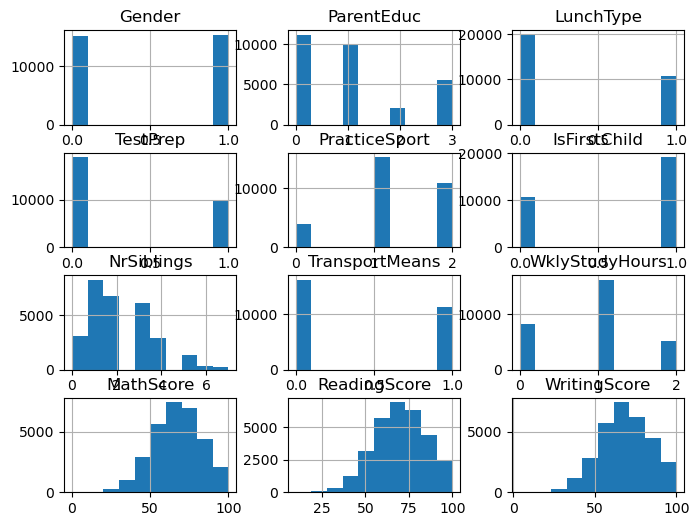

In [24]:
# Now I can plot all features 
df_exam_score.hist(figsize=(8,6))

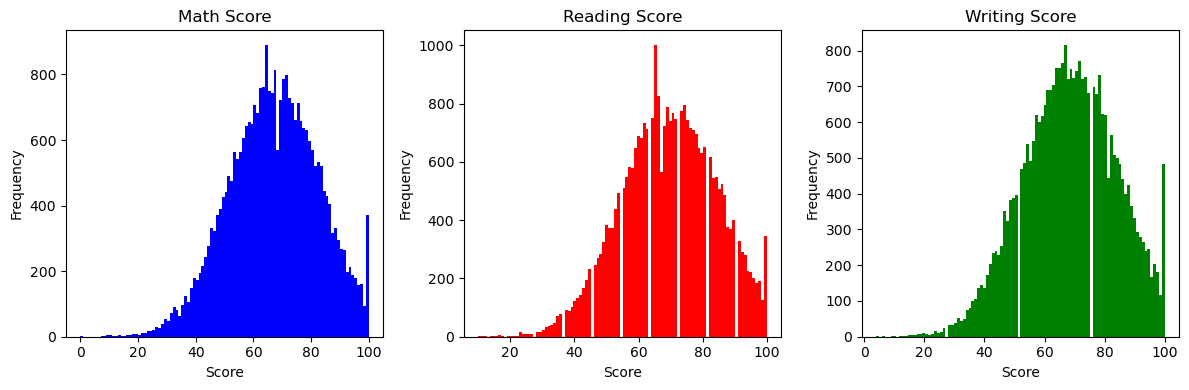

In [25]:
# a better visualization of scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

df_exam_score['MathScore'].plot(kind='hist', bins=100, ax=axes[0], color='blue', title='Math Score')
df_exam_score['ReadingScore'].plot(kind='hist', bins=100, ax=axes[1], color='red', title='Reading Score')
df_exam_score['WritingScore'].plot(kind='hist', bins=100, ax=axes[2], color='green', title='Writing Score')

for ax in axes:
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

plt.tight_layout() # to avoid overlap
plt.show()

## HANDLING MISSING VALUES
**FILLING WITH RANDOM FOREST:** 
Random Forest emerges as a strong option for filling in missing data due to its efficiency and adaptability. It handles large datasets well, deals effectively with nonlinearities, and manages outliers proficiently. With the capacity to handle both numerical and categorical data types, Random Forests also come equipped with built-in feature selection capabilities. These qualities collectively establish Random Forests as a reliable and effective solution for missing data imputation.

In [26]:
for column in df_exam_score.columns:
    if df_exam_score[column].isna().any():
        df_exam_score = fc.impute_missing_values_with_random_forest(df_exam_score, column)

In [27]:
df_exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  int64  
 1   EthnicGroup          30641 non-null  object 
 2   ParentEduc           30641 non-null  float64
 3   LunchType            30641 non-null  int64  
 4   TestPrep             30641 non-null  float64
 5   ParentMaritalStatus  30641 non-null  object 
 6   PracticeSport        30641 non-null  float64
 7   IsFirstChild         30641 non-null  float64
 8   NrSiblings           30641 non-null  float64
 9   TransportMeans       30641 non-null  float64
 10  WklyStudyHours       30641 non-null  float64
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 3.3+ MB


In [28]:
df_exam_score['EthnicGroup'].unique()

array(['group D', 'group C', 'group B', 'group A', 'group E'],
      dtype=object)

In [29]:
# Applying one-hot encoding to the specified features
# Converts categorical variables into numerical representation.
# How it works: It creates new binary columns (0s and 1s) for each category in the original categorical variable.
df_exam_score = pd.get_dummies(df_exam_score, columns=['EthnicGroup', 'ParentMaritalStatus'], dummy_na=True)

df_exam_score.head().T

,0,1,2,3,4
Gender,1.00,1.00,1.00,0.00,0.00
ParentEduc,1.00,1.00,2.00,3.00,1.00
LunchType,0.00,0.00,0.00,1.00,0.00
TestPrep,0.00,1.00,0.00,0.00,0.00
PracticeSport,2.00,1.00,1.00,0.00,1.00
IsFirstChild,1.00,1.00,1.00,0.00,1.00
NrSiblings,3.00,0.00,4.00,1.00,0.00
TransportMeans,0.00,0.00,0.00,0.00,0.00
WklyStudyHours,0.00,1.00,0.00,1.00,1.00
MathScore,71.00,69.00,87.00,45.00,76.00


In [30]:
df_exam_score.drop('EthnicGroup_nan', axis=1, inplace=True)
df_exam_score.drop('ParentMaritalStatus_nan', axis=1, inplace=True)

In [31]:
df_exam_score.head().T

,0,1,2,3,4
Gender,1.00,1.00,1.00,0.00,0.00
ParentEduc,1.00,1.00,2.00,3.00,1.00
LunchType,0.00,0.00,0.00,1.00,0.00
TestPrep,0.00,1.00,0.00,0.00,0.00
PracticeSport,2.00,1.00,1.00,0.00,1.00
IsFirstChild,1.00,1.00,1.00,0.00,1.00
NrSiblings,3.00,0.00,4.00,1.00,0.00
TransportMeans,0.00,0.00,0.00,0.00,0.00
WklyStudyHours,0.00,1.00,0.00,1.00,1.00
MathScore,71.00,69.00,87.00,45.00,76.00


The plot displays how students' scores are spread across different subjects, revealing slight variations.Generally, students perform better in reading and writing, as indicated by the predominance of scores above 35-40 to 100 in these subjects. In the other hand, math scores show a wider range, with numerous scores falling also below 30.

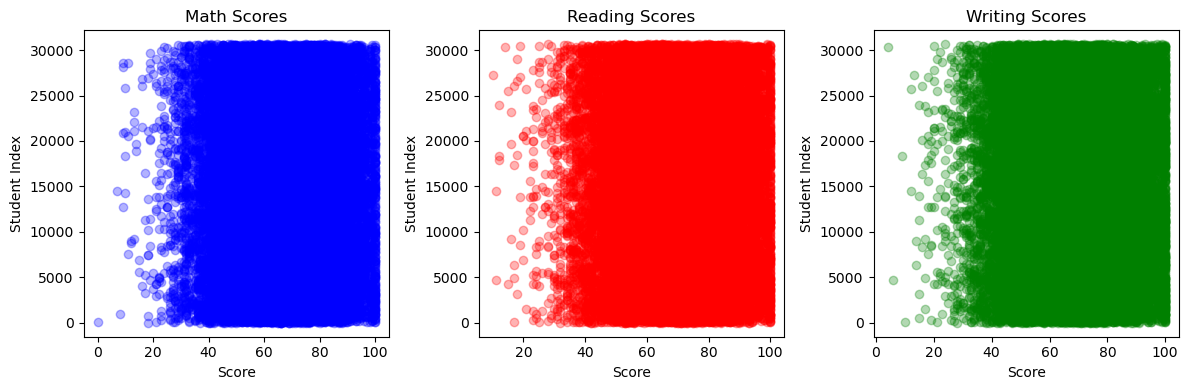

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_exam_score['MathScore'], df_exam_score.index, color='blue', alpha=0.3) 
plt.title('Math Scores')  
plt.xlabel('Score')
plt.ylabel('Student Index')

plt.subplot(1, 3, 2)
plt.scatter(df_exam_score['ReadingScore'], df_exam_score.index, color='red', alpha=0.3) 
plt.title('Reading Scores')  
plt.xlabel('Score')
plt.ylabel('Student Index')

plt.subplot(1, 3, 3)
plt.scatter(df_exam_score['WritingScore'], df_exam_score.index, color='green', alpha=0.3) 
plt.title('Writing Scores')  
plt.xlabel('Score')
plt.ylabel('Student Index')

plt.tight_layout()
plt.show()


## CORRELATION:
I transformed categorical values into numerical in order to have a new dataframe that I can use to see all correlations.

In [33]:
# check if I have complete dataset without missing values
df_exam_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        30641 non-null  int64  
 1   ParentEduc                    30641 non-null  float64
 2   LunchType                     30641 non-null  int64  
 3   TestPrep                      30641 non-null  float64
 4   PracticeSport                 30641 non-null  float64
 5   IsFirstChild                  30641 non-null  float64
 6   NrSiblings                    30641 non-null  float64
 7   TransportMeans                30641 non-null  float64
 8   WklyStudyHours                30641 non-null  float64
 9   MathScore                     30641 non-null  int64  
 10  ReadingScore                  30641 non-null  int64  
 11  WritingScore                  30641 non-null  int64  
 12  EthnicGroup_group A           30641 non-null  uint8  
 13  E

In [34]:
df_exam_score.WklyStudyHours.unique()

array([0., 1., 2.])

In [35]:
df_exam_score_corr = df_exam_score.corr()
df_exam_score_corr

,Gender,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,...,WritingScore,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
Gender,1.00,-0.00,-0.00,0.01,0.00,-0.01,0.00,0.01,0.00,-0.16,...,0.29,0.00,0.00,-0.01,-0.00,0.00,0.02,-0.02,0.01,-0.01
ParentEduc,-0.00,1.00,0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.14,...,0.17,-0.01,-0.00,-0.00,0.01,0.00,-0.01,0.00,0.01,-0.00
LunchType,-0.00,0.01,1.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.37,...,-0.27,-0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.01,0.01,0.01
TestPrep,0.01,0.01,0.00,1.00,-0.00,-0.00,-0.01,0.01,-0.00,0.14,...,0.30,-0.01,0.01,-0.00,0.01,-0.01,0.00,-0.00,-0.00,-0.00
PracticeSport,0.00,0.00,0.00,-0.00,1.00,0.01,-0.01,-0.01,-0.00,0.08,...,0.07,-0.00,-0.01,0.00,-0.00,0.01,0.00,0.00,-0.00,-0.01
IsFirstChild,-0.01,-0.00,-0.00,-0.00,0.01,1.00,-0.12,0.00,-0.00,0.02,...,0.01,-0.01,0.01,-0.01,0.00,0.00,0.00,0.01,-0.01,0.01
NrSiblings,0.00,-0.00,-0.00,-0.01,-0.01,-0.12,1.00,0.01,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00
TransportMeans,0.01,-0.00,-0.00,0.01,-0.01,0.00,0.01,1.00,0.01,-0.01,...,0.00,0.01,-0.00,0.01,-0.01,-0.01,-0.01,0.01,-0.00,-0.00
WklyStudyHours,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.01,1.00,0.09,...,0.06,0.01,-0.01,-0.01,0.01,0.01,-0.00,0.00,0.00,-0.00
MathScore,-0.16,0.14,-0.37,0.14,0.08,0.02,-0.00,-0.01,0.09,1.00,...,0.81,-0.07,-0.10,-0.08,0.04,0.23,0.00,0.01,-0.01,0.01


## Plot the correlation

<AxesSubplot:>

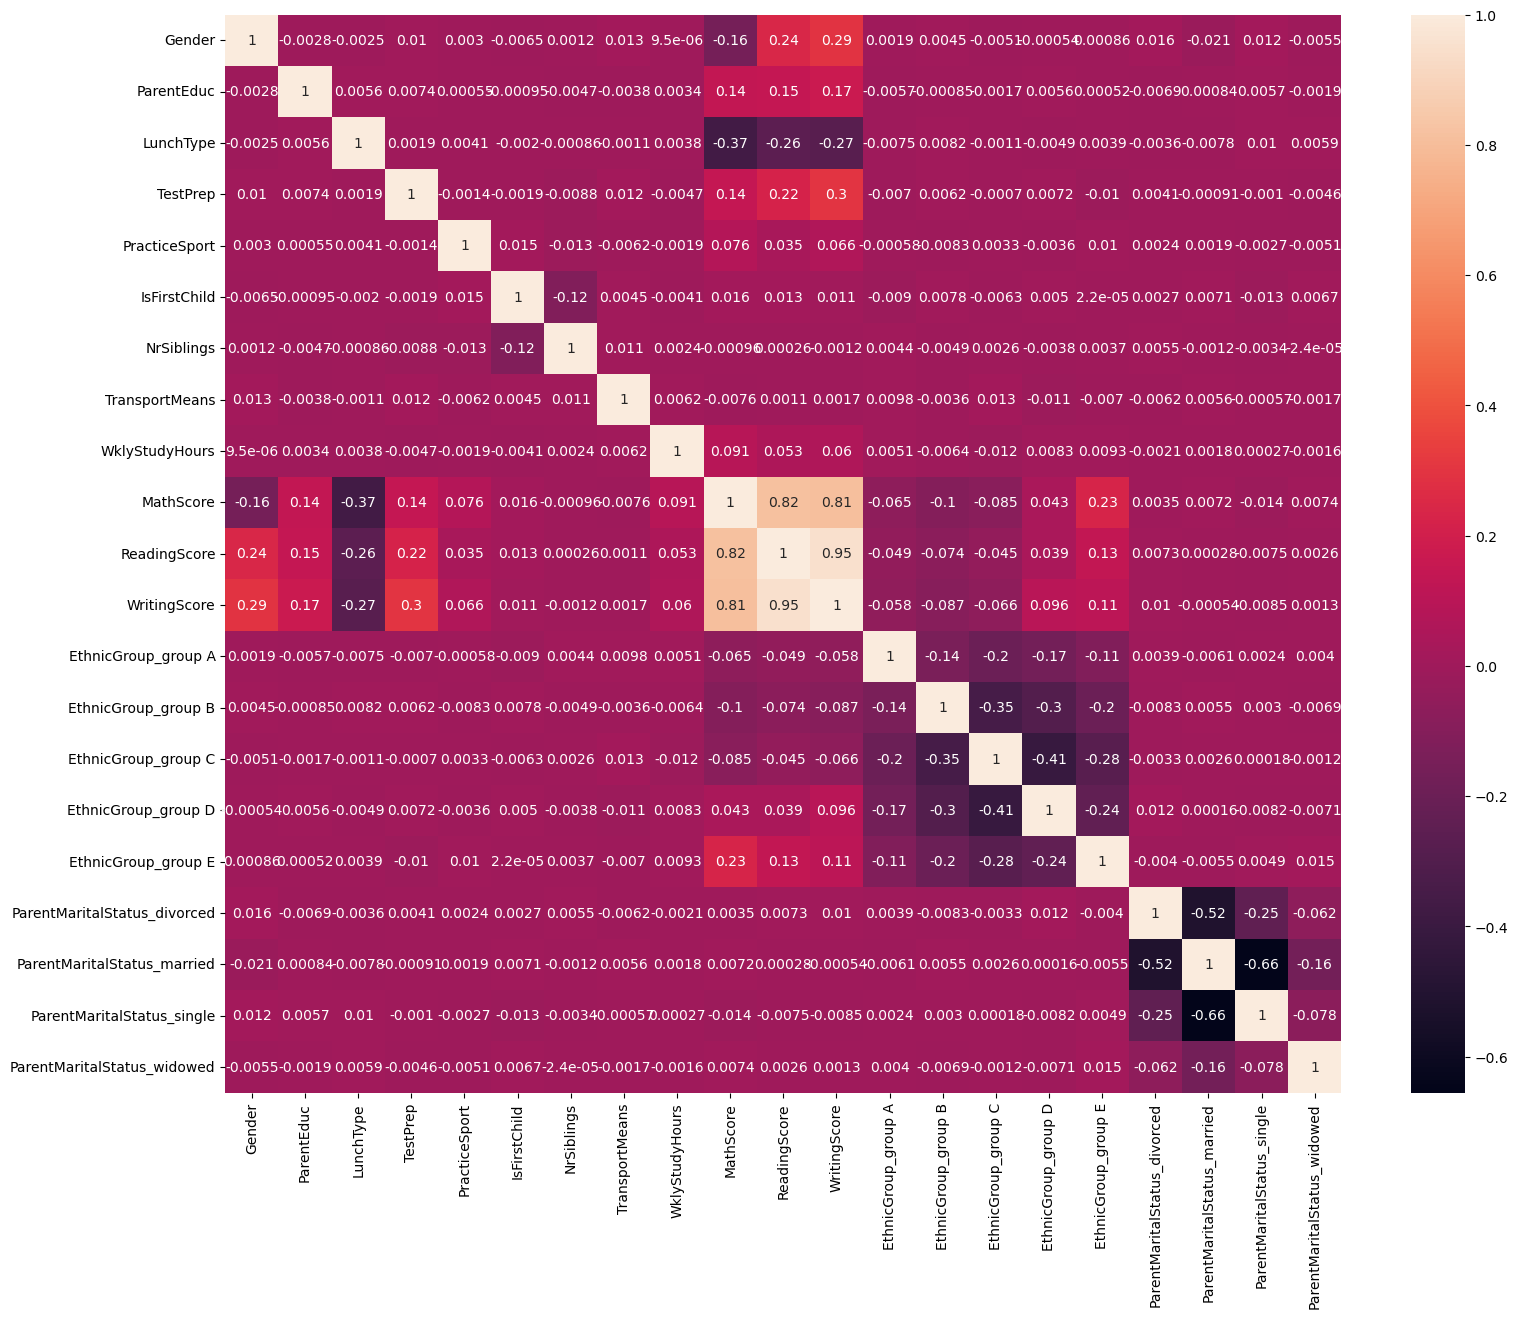

In [36]:
plt.figure(figsize=(18, 14))
sns.heatmap(df_exam_score_corr, annot=True)

## **COMMENT ABOUT CORRELATION:**
From the table we get following information:
- the most influencing features for scores are:
    - gender
    - parent education 
    - lunchtype
    - test preparation
    - sport practicing
    - weekly study hours
    - ethnic group

<br>We can also see that reading and writing scores are more correlated. So we can say that who is good at reading is also good in writing. 

add plos and comments
- how scores are correlated? students which are good are  good  in generall or its most common that they can be good in smth and not in others
- relation between gender and scores 
- relation between ethnic groups and scores
- how test preparation, lunch type and sport influence scores 

By analyzing this plot we can see that male students are better in Mathematics, instead female sudents are better in Reading and Writing.

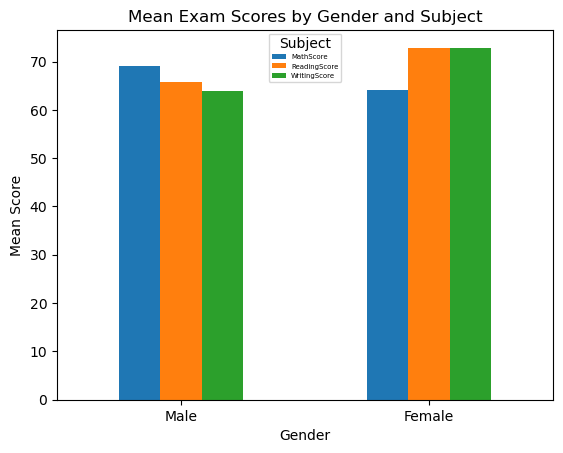

In [37]:
scores_for_each_gender = df_exam_score.groupby('Gender').mean()
scores_for_each_gender[["MathScore", "ReadingScore", "WritingScore"]]


ax = scores_for_each_gender[["MathScore", "ReadingScore", "WritingScore"]].plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean Exam Scores by Gender and Subject')
plt.legend(title='Subject',loc='upper center', prop={'size': 5} )
ax.set_xticklabels(['Male', 'Female'])
plt.show()

By this plot we can see that practicing sport regulary influence better student score, especially reading and writing scores.  

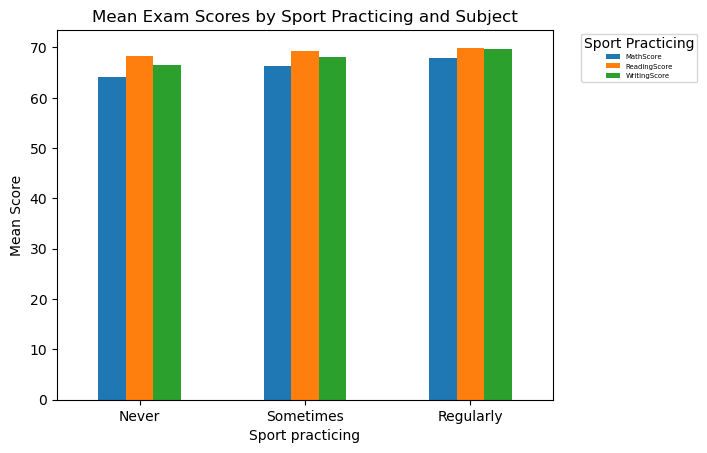

In [38]:
scores_correlation_with_ethnic_group = df_exam_score.groupby('PracticeSport').mean()
scores_correlation_with_ethnic_group[["MathScore", "ReadingScore", "WritingScore"]]

ax = scores_correlation_with_ethnic_group[["MathScore", "ReadingScore", "WritingScore"]].plot(kind='bar', rot=0)
plt.xlabel('Sport practicing')
plt.ylabel('Mean Score')
plt.title('Mean Exam Scores by Sport Practicing and Subject')
plt.legend(title='Sport Practicing', bbox_to_anchor=(1.05, 1), prop={'size': 5} )
ax.set_xticklabels(['Never', 'Sometimes', 'Regularly'])
plt.show()

By this plot we can comment:
Students belonging to the Group A have better scores then other groups in all subjects. And they are good espacially in Mathematics. Instead other groups are better in Reading and Writing. 

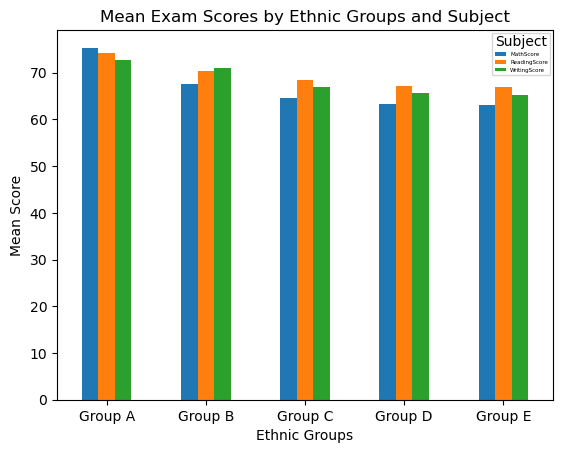

In [39]:
ethnic_group_list = list(df_exam_score[['EthnicGroup_group A', 'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E']])
scores_correlation_with_ethnic_groups = df_exam_score.groupby(ethnic_group_list).mean()
scores_correlation_with_ethnic_groups[["MathScore", "ReadingScore", "WritingScore"]]


ax = scores_correlation_with_ethnic_groups[["MathScore", "ReadingScore", "WritingScore"]].plot(kind='bar', rot=0)
plt.xlabel('Ethnic Groups')
plt.ylabel('Mean Score')
plt.title('Mean Exam Scores by Ethnic Groups and Subject')
plt.legend(title='Subject',loc='upper right', prop={'size': 4} )
ax.set_xticklabels(['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

# MODEL

In [40]:
# df_exam_score.info()

## BUILDING MODEL

Preparation for model training and evaluation:

In [41]:
X = df_exam_score.drop(['MathScore','ReadingScore','WritingScore'], axis=1)
y_math=df_exam_score['MathScore']
y_read=df_exam_score['ReadingScore']
y_write=df_exam_score['WritingScore']

In [42]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    print(f'MAE score is: {MAE}')
    MSE = metrics.mean_squared_error(y_test, y_pred)
    print(f'MSE score is: {MSE}')
    RMSE = np.sqrt(MSE)
    print(f'RMSE score is: {RMSE}')
    R2_Score = metrics.r2_score(y_test, y_pred)
    print(f'R2_Score score is: {R2_Score}')
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])


def model_train(X,y,model):
    #split dataset by taking 80% of data for training and 20% of data for testing.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model.fit(X_train, y_train)

    model_evaluation(model, X_test, y_test, 'Linear Reg.')
    
    return model

**First trial:** LinearRegressor on Math Score.

In [43]:
model=LinearRegression()
model_math=model_train(X,y_math,model)

MAE score is: 10.538205052331879
MSE score is: 169.2170855112697
RMSE score is: 13.008346763185154
R2_Score score is: 0.2821964284922207


**Second Trial:** PolyRegressor of *degree=2* and *degree=3* on Math Score

In [44]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
model = LinearRegression()
model_math=model_train(X_poly,y_math,model)

MAE score is: 10.476459524957871
MSE score is: 167.51356389309774
RMSE score is: 12.942703113843635
R2_Score score is: 0.2894226131175498


In [45]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
model = LinearRegression()
model_math=model_train(X_poly,y_math,model)

MAE score is: 10.572917437666217
MSE score is: 171.12734242119566
RMSE score is: 13.08156498363998
R2_Score score is: 0.27409329145792305


Since scores slightly drop with degree increase, degree of 2 is accepted sufficient.

**Fourth Trial:** Random Forest Regression on Math Score

In [46]:
model=RandomForestRegressor(n_estimators=100)
model_math=model_train(X,y_math,model)

MAE score is: 11.697974325401306
MSE score is: 212.89108174796007
RMSE score is: 14.590787564348954
R2_Score score is: 0.09693528665187245


**Fifth Trial:** XGBoost

In [47]:
model = XGBRegressor(learning_rate=0.05,max_depth=2,n_estimators= 150)
model_math=model_train(X,y_read,model)

MAE score is: 10.542120935555518
MSE score is: 168.64830718620186
RMSE score is: 12.986466308669263
R2_Score score is: 0.22005246560145442


Decision: From trials, highest score is on Polynomial regression with 2 degrees, so its best algorithm for model. 

In [48]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Create and fit the polynomial regression model
model = LinearRegression()
print('Math Model Evaluation')
model_math=model_train(X_poly,y_math,model)
print('Reading Model Evaluation')
model_read=model_train(X_poly,y_read,model)
print('writing Model Evaluation')
model_write=model_train(X_poly,y_write,model)

Math Model Evaluation
MAE score is: 10.476459524957871
MSE score is: 167.51356389309774
RMSE score is: 12.942703113843635
R2_Score score is: 0.2894226131175498
Reading Model Evaluation
MAE score is: 10.539442563099735
MSE score is: 168.91656465208297
RMSE score is: 12.996790551981784
R2_Score score is: 0.21881185576321305
writing Model Evaluation
MAE score is: 10.272621128644303
MSE score is: 160.26748187506942
RMSE score is: 12.65967937489214
R2_Score score is: 0.32100074826312663


In [55]:

# Train and evaluate the math model
model.fit(X_poly, y_math)
y_pred_math = model.predict(X_poly)
mse_math = mean_squared_error(y_math, y_pred_math)
r2_math = r2_score(y_math, y_pred_math)

# Train and evaluate the reading model
model.fit(X_poly, y_read)
y_pred_read = model.predict(X_poly)
mse_read = mean_squared_error(y_read, y_pred_read)
r2_read = r2_score(y_read, y_pred_read)

# Train and evaluate the writing model
model.fit(X_poly, y_write)
y_pred_write = model.predict(X_poly)
mse_write = mean_squared_error(y_write, y_pred_write)
r2_write = r2_score(y_write, y_pred_write)

# Create a DataFrame to display the evaluation metrics
data = {
    'Model': ['Math', 'Reading', 'Writing'],
    'MSE': [mse_math, mse_read, mse_write],
    'R2 Score': [r2_math, r2_read, r2_write]
}

df = pd.DataFrame(data)

df


,Model,MSE,R2 Score
0,Math,166.51,0.29
1,Reading,167.10,0.23
2,Writing,158.97,0.33
